In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [5]:
emp = pd.read_excel('myexcel.xlsx')
display(emp)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


To replace the "height" column with random numbers between 150 and 180. 

In [6]:
from random import randint

emp['Height'] = emp.groupby('Height')['Height'].transform(lambda x: randint(150,180))
display(emp)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,176,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,176,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,174,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,155,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,154,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,168,231,Kansas,947276.0


To check which all columns contain null values

In [7]:
emp.isnull().any()

Name        False
Team        False
Number      False
Position    False
Age         False
Height      False
Weight      False
College      True
Salary       True
dtype: bool

College and salary column contains Nan values

1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)

In [8]:

sv=emp['Team'].value_counts().reset_index(name='Emp_count')
sv['Percent'] = (sv['Emp_count'] / sv['Emp_count'].sum()) * 100
sv

,Team,Emp_count,Percent
0,New Orleans Pelicans,19,4.148472
1,Memphis Grizzlies,18,3.930131
2,Utah Jazz,16,3.493450
3,New York Knicks,16,3.493450
4,Milwaukee Bucks,16,3.493450
5,Brooklyn Nets,15,3.275109
6,Portland Trail Blazers,15,3.275109
7,Oklahoma City Thunder,15,3.275109
8,Denver Nuggets,15,3.275109
9,Washington Wizards,15,3.275109


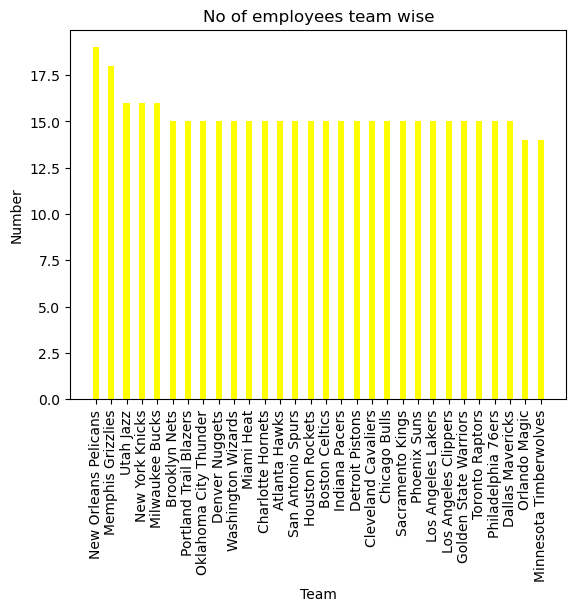

In [9]:
x=list(sv.iloc[:,0])
y=list(sv.iloc[:,1])
plt.bar(x,y,color='yellow',width=0.4)

plt.title("No of employees team wise")
plt.xlabel("Team")
plt.xticks(rotation=90)


plt.ylabel("Number")
plt.show()

Out of 29 teams 21 teams have the same no of employees...ie  15 employees and each of these teams contribute 3.275% count of the total.
New Orlens pelicans have the highets no of employees .
Orland magic and minnesota timberwave have the lowest count

2. Segregate employees based on their positions within the company. (2 marks)


In [10]:
two=emp['Position'].value_counts().reset_index(name='Emp_count')
two

,Position,Emp_count
0,SG,102
1,PF,100
2,PG,92
3,SF,85
4,C,79


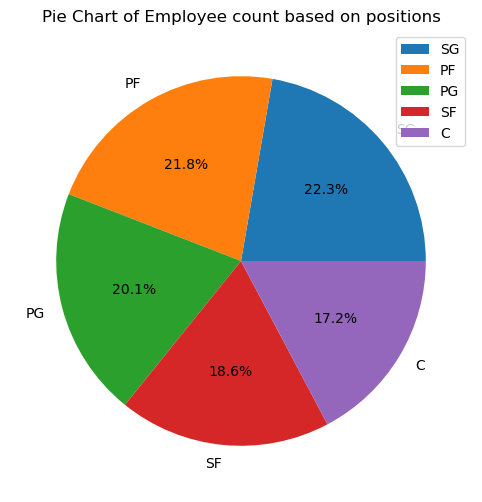

In [11]:
plt.figure(figsize=(8, 6))
plt.pie(two['Emp_count'], labels=two['Position'], autopct='%1.1f%%')
plt.title('Pie Chart of Employee count based on positions')
plt.legend()
plt.show()


SG occupies the majority portion of the pie, so ,sg has the highest count.
Followed by pf,pg,sf and c.

3. Identify the predominant age group among employees. (2 marks)


In [12]:
third=emp['Age'].value_counts().reset_index(name='Emp_count')
third

,Age,Emp_count
0,24,47
1,25,46
2,27,41
3,23,41
4,26,36
5,28,31
6,30,31
7,29,28
8,22,26
9,31,22


Text(0.5, 1.0, 'Distribution of Age')

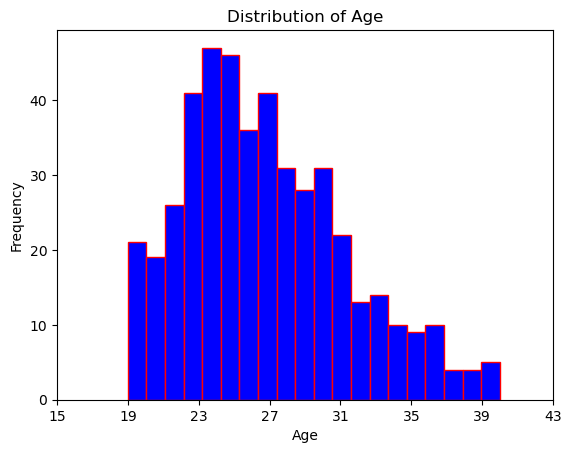

In [13]:
emp['Age'].hist(bins=20,color='blue',edgecolor='red', grid=False)

# add labels and title
plt.xlabel('Age')
plt.xticks(np.arange(15, 45, step=4))
plt.ylabel('Frequency')
plt.title('Distribution of Age')


it is clear from the graph that most of the employees fall in the age group of 23 to27 becausthe bar graphs correspondiing to them is the highest. it shows that youth are selected as majority of the employees in the ABC company. Freshers are given more oppurtunities by this ABC.
Less than 10 employees fall in the age group of 39 to 40

4. Discover which team and position have the highest salary expenditure. (2 marks)


In [14]:
four=emp[['Team','Position','Salary']]
four
fore=four.groupby(['Team','Position'])
foree= fore['Salary'].sum()
foreee = foree.reset_index()
foreee.sort_values(['Salary']).tail(1)


,Team,Position,Salary
67,Los Angeles Lakers,SF,31866445.0


Text(0, 0.5, 'Salary in 10000000')

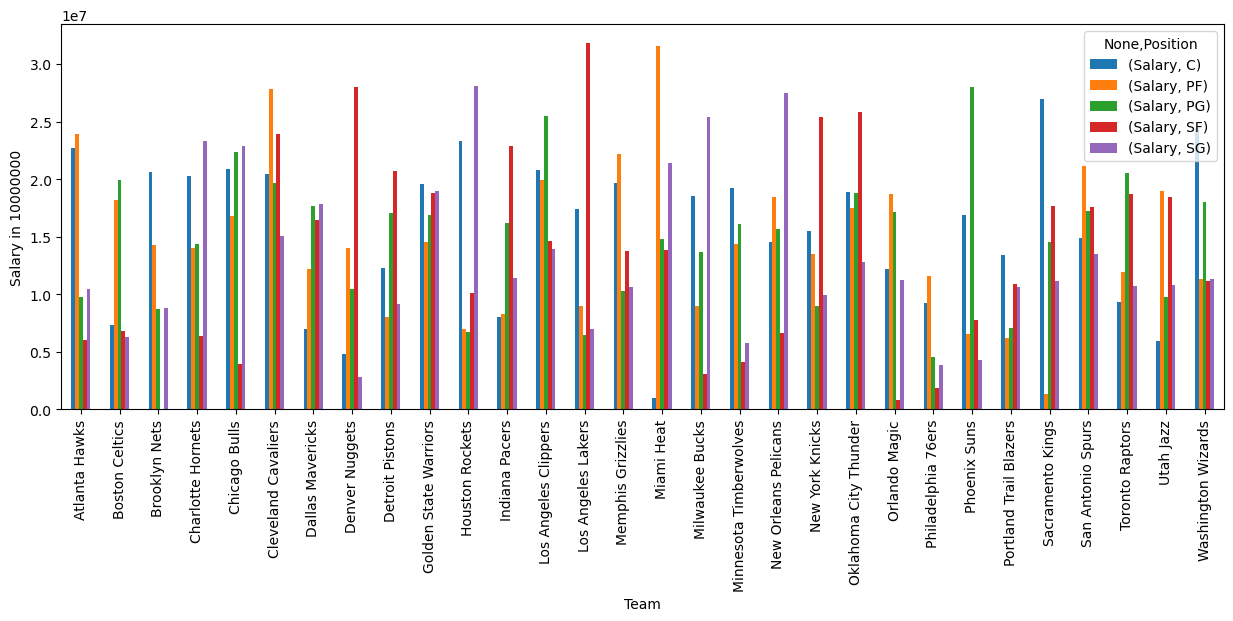

In [24]:
cu=four.groupby(['Team','Position']).sum().unstack('Position')
cu.plot(kind='bar')
plt.rcParams['figure.figsize'] = [10, 10]
plt.ylabel('Salary in 10000000')

From the graph it is clear that team Los Angeles Lakers's SF position is buying the highest salary and yhis amount sums upto a total of 3*10e7 dollars.

Team
Chicago Bulls             86783378.0
Golden State Warriors     88868997.0
Oklahoma City Thunder     93765298.0
Los Angeles Clippers      94854640.0
Cleveland Cavaliers      106988689.0
Name: Salary, dtype: float64

<Axes: xlabel='Team'>

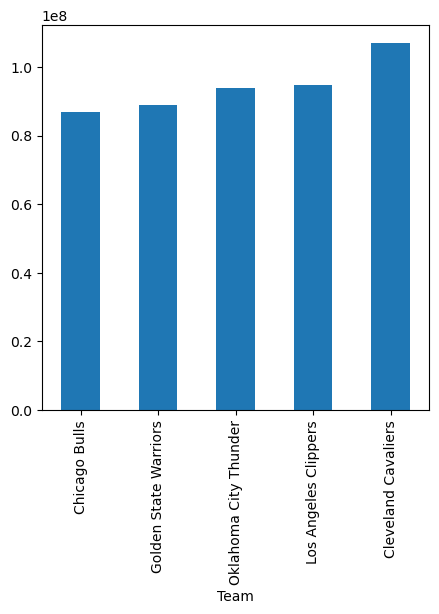

In [28]:
f=four.groupby('Team')['Salary'].sum().sort_values().tail()
display(f)
f.plot(kind='bar')


but if we consider team only cleveland cavaliers secure the highest salary.

Position
SG    396976258.0
SF    408020976.0
PF    442560850.0
PG    446848971.0
C     466377332.0
Name: Salary, dtype: float64

<Axes: xlabel='Position'>

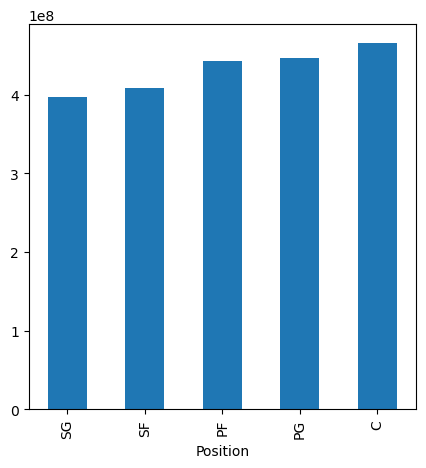

In [29]:
ff=four.groupby('Position')['Salary'].sum().sort_values().tail()
display(ff)
ff.plot(kind='bar')

and if we consider position only then C has the highest salary.

5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)


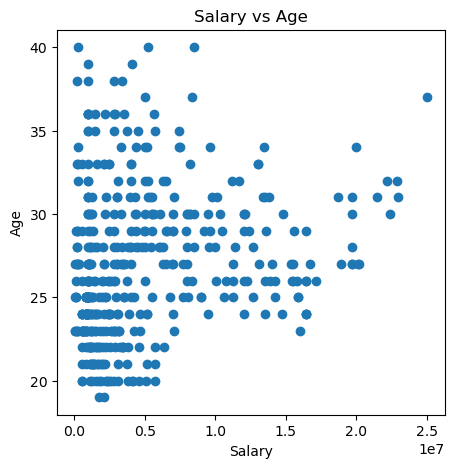

In [31]:
five=emp[['Age','Salary']]
five
plt.scatter(five['Salary'],five['Age'])
plt.xlabel("Salary")
plt.ylabel("Age")
plt.title("Salary vs Age")
plt.show()

Most of the employees have a salary ranging from 1000000 to 5000000 
As the age increases salary is increasing. People in the age group(ie above 25 and below 35) secure the highest salary packages.
employees below 25 and above 35 are payesd the least salaries

Company is hiring more low aged people so that it can pay low salary.
employees above 35 are also not welcomed by this company(points are very less in that area)may be because as the age 
of employee increases  the employees experience increase therefore the company is forced to pay a high salary